In [7]:
import numpy as np
import pandas as pd             
all_evidence=np.array(
#0 obs  1 LS  2 LF2   3 LF  4 HF2   5 HF   6 HS
[[7.08, 9.13 ,9.73, 10.56, 14.37, 14.56,13.74],       #0 sst
[3.31, 4.6, 4.35 ,5.29 ,7.54 ,7.25,6.27],             #1 gam
[11.82, 14.23, 14.78 ,15.47, 18.72 ,18.83,18.13],     #2  top
[7.15, 9.28, 10.77, 10.92 ,18.09, 17.98,16.63],       #3  pow
[8.76 , 11.38 , 12.45, 13.06, 15.60 , 15.83,14.89],   #4 2g^{max}_{min}
[7.18 ,  9.64 , 10.89 , 11.59 , 14.22 , 14.37,13.75], #5 2g_{min}
[7.01, 9.92, 11.38 ,11.55, 13.10, 13.00,12.69],       #6 2g^{max}
[5.91, 8.73, 9.67 ,10.20, 11.86 ,11.48,11.48],        # 7 2g
[4.87 ,7.62, 8.37, 9.30 ,11.01,11.17,10.51],          #8  3g
[3.81 ,5.09, 5.30 ,6.01, 8.34 ,8.38,7.15],            #9 logN
[3.55, 3.50 ,3.93 ,4.11, 4.84, 5.10,5.01],            #10  logU
[0.49 ,0.65, 0.84, 1.34, 4.03, 3.81,2.11],            #11  g
[33.75, 34.98 ,35.76 ,35.08 ,34.81 ,34.98,35.81]])    # 12 u

In [4]:
LS_col=all_evidence[:-1,1]
HF_col=all_evidence[:-1,5]
HF_col_pick=[all_evidence[2,5],all_evidence[3,5],all_evidence[4,5],all_evidence[0,5],all_evidence[5,5],all_evidence[6,5]]-all_evidence[7,5]#top pow 2gcm  sst  2gc

In [5]:
TOP_raw=all_evidence[2,:]
TGC_raw=all_evidence[7,:]
bf_top_2gc=TOP_raw-TGC_raw
bf_top_2gc_rank=[bf_top_2gc[3],bf_top_2gc[1],bf_top_2gc[0],bf_top_2gc[6],bf_top_2gc[5]] #LF LS OBS HS HF

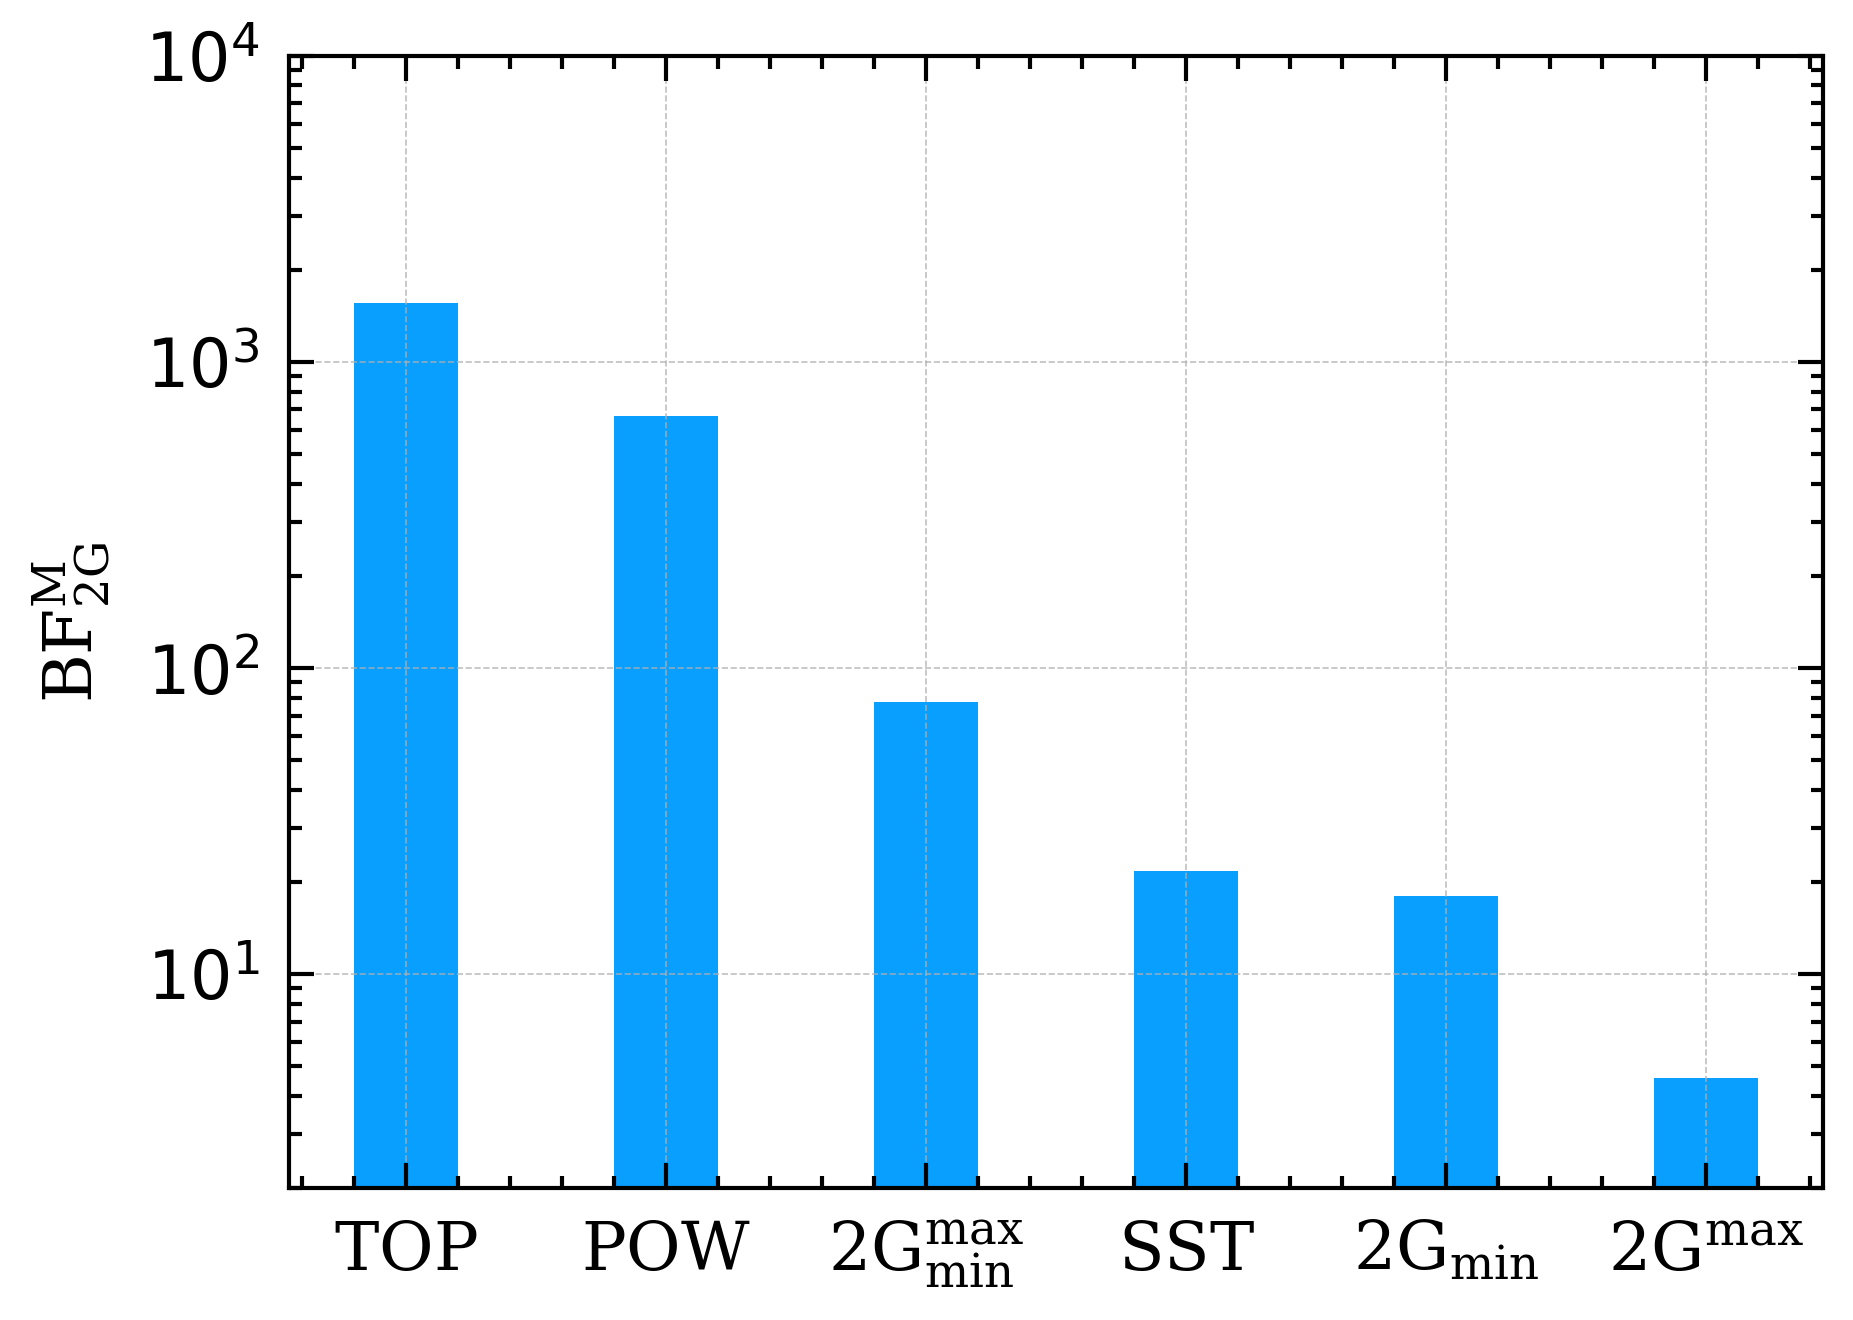

In [12]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
plt.style.use(['science','ieee','no-latex'])

index=[r'$\rm{TOP}$', r'$\rm{POW}$', r'$\rm{2G^{max}_{min}}$',r'$\rm{SST}$',r'$\rm{2G_{min}}$',r'$\rm{2G^{max}}$'] #top pow 2gcm  sst  2gc
df1 = pd.DataFrame({r'$\rm{HF}$': np.exp(HF_col_pick)},
                  index=index)

ax = df1.plot.bar(width=0.4,color= [ '#089FFF','#ff7f0e'])
ax.grid(b=True,linestyle='--',lw=0.2,alpha=0.8)
ax.get_legend().remove()
plt.ylim(2,10*10**3)
plt.yscale('log')
plt.xticks(rotation=0 ) 
plt.ylabel(r'$\rm{BF^{M}_{2G}}$')
plt.savefig('bf_m_2g_HFdata.jpg')

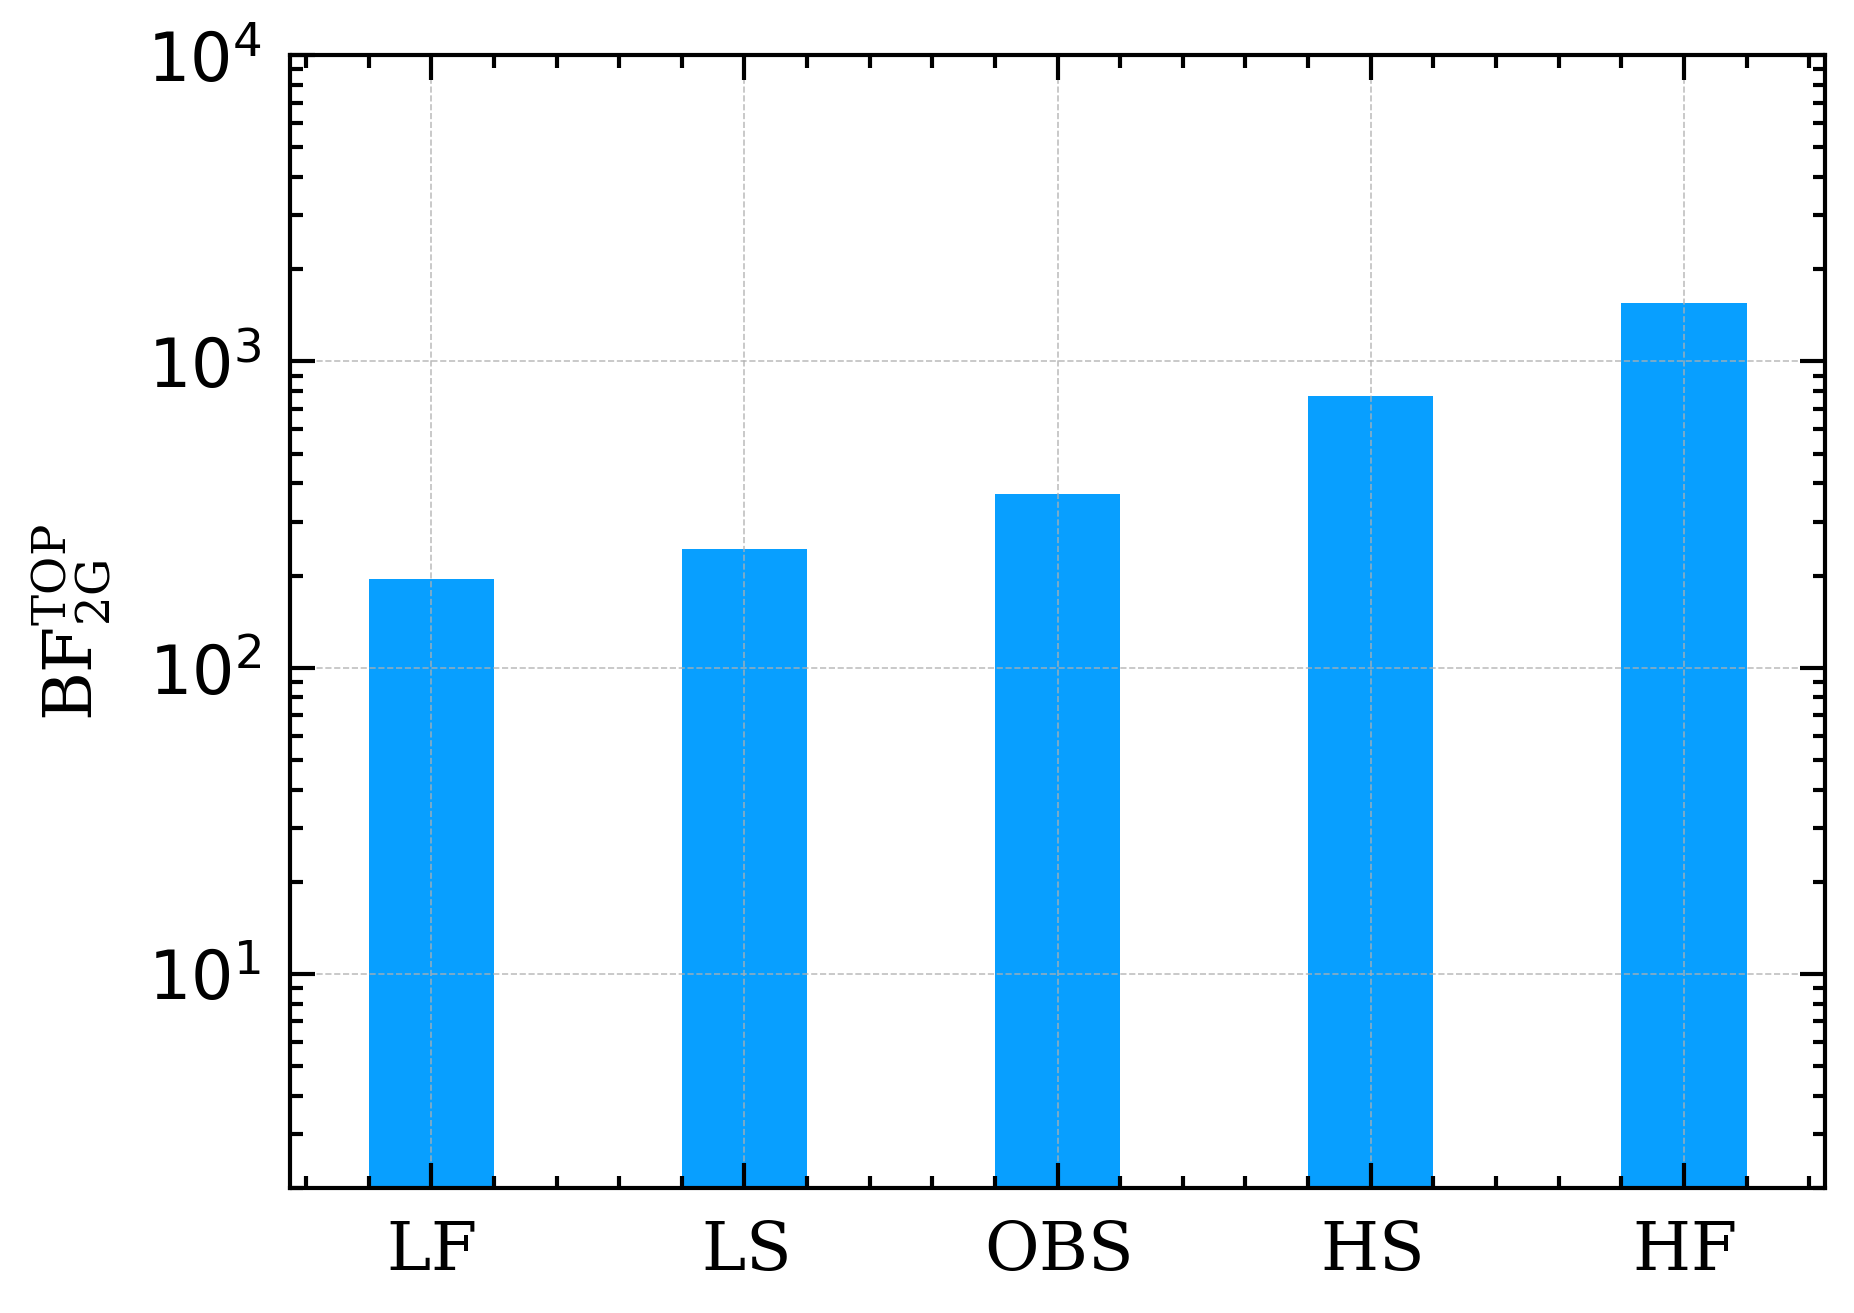

In [11]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
plt.style.use(['science','ieee','no-latex'])

index=[ r'$\rm{LF}$', r'$\rm{LS}$',r'$\rm{OBS}$',r'$\rm{HS}$',r'$\rm{HF}$'] #LF2 LF LS OBS HS HF2 HF
df1 = pd.DataFrame({r'$\rm{HF}$': np.exp((bf_top_2gc_rank))},
                  index=index)

ax = df1.plot.bar(width=0.4,color= [ '#089FFF','#ff7f0e'])
ax.grid(b=True,linestyle='--',lw=0.2,alpha=0.8)
ax.get_legend().remove()
#plt.xlim(0,6)
plt.yscale('log')
plt.ylim(2,10**4)
plt.xticks(rotation=0 ) 
#plt.xlabel(r'$\rm{Odds}$')
plt.ylabel(r'$\rm{BF^{TOP}_{2G}}$')
plt.savefig('bf_top_2g_different_data.jpg')